In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("updated_pollution_dataset.csv")
data.head(5)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [4]:
data.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [5]:
data.isnull().any()

Temperature                      False
Humidity                         False
PM2.5                            False
PM10                             False
NO2                              False
SO2                              False
CO                               False
Proximity_to_Industrial_Areas    False
Population_Density               False
Air Quality                      False
dtype: bool

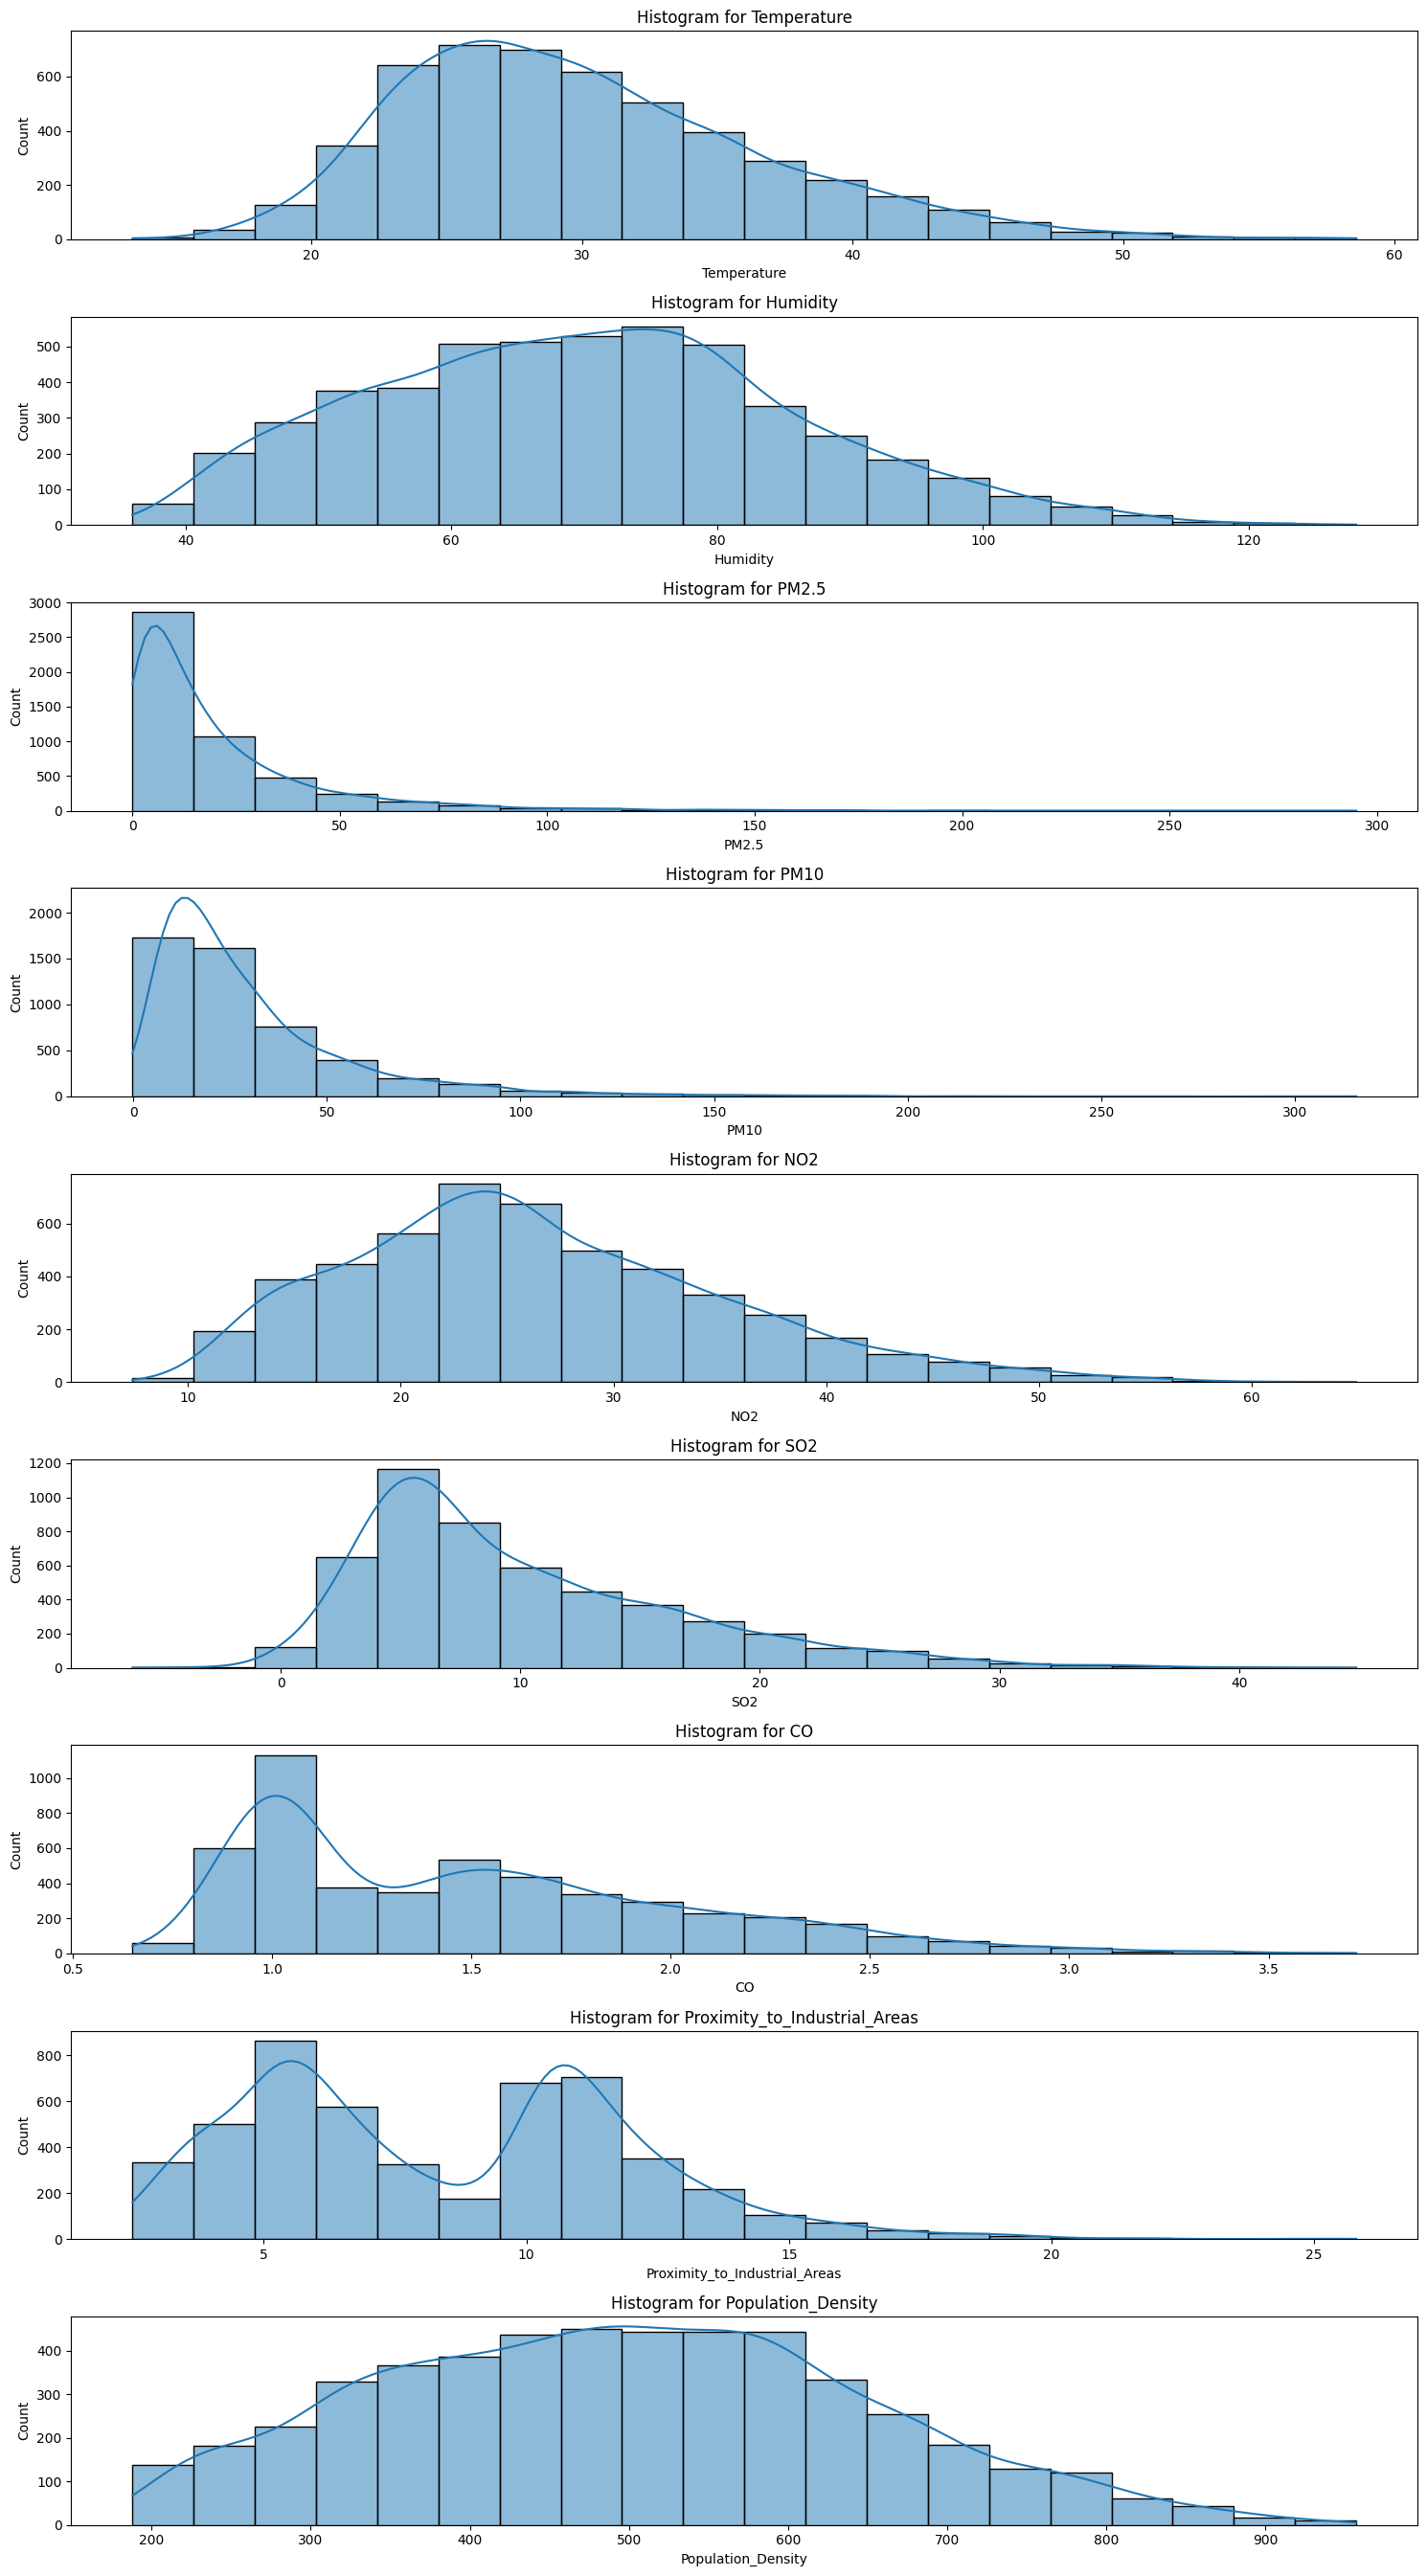

In [6]:
numerical_columns=data.select_dtypes(include=["number"]).columns
plt.figure(figsize=(15,len(numerical_columns)*3))
for i, col in enumerate(numerical_columns,1):
    plt.subplot(len(numerical_columns),1,i)
    sns.histplot(data[col],kde=True,bins=20)
    plt.title(f"Histogram for {col}")
plt.tight_layout()
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
data["Air Quality"]=le.fit_transform(data["Air Quality"])

<Axes: >

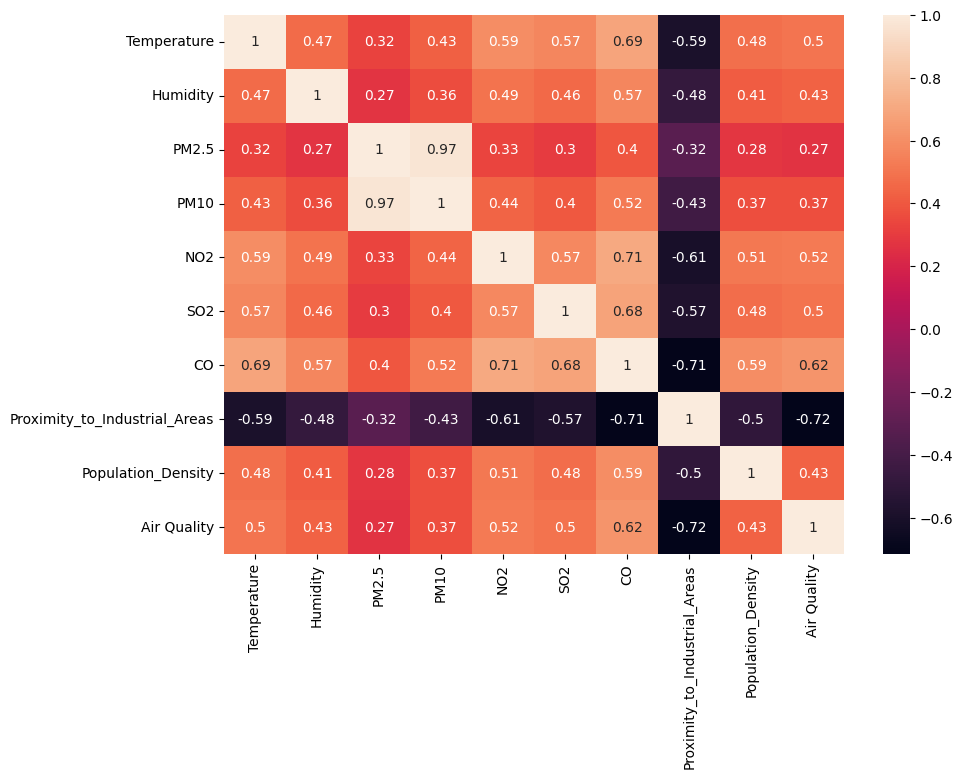

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

In [28]:
x=data.drop("Air Quality",axis=1)
y=data["Air Quality"]

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [31]:
classifier={
    "Random Forest Classifier":RandomForestClassifier(),
    "Ada Boost Classifier":AdaBoostClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Naive Bayes Classifier":GaussianNB()
}

In [32]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [39]:
for name,clf in classifier.items():
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"{name}")
    print(f"{accuracy*100}")
    print(classification_report(y_test,y_pred))
    print("-"*60)

Random Forest Classifier
95.39999999999999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.89      0.88      0.89       111
           2       0.96      0.97      0.96       294
           3       0.88      0.88      0.88       186

    accuracy                           0.95      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.95      0.95      0.95      1000

------------------------------------------------------------


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Ada Boost Classifier
85.9
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       409
           1       0.70      0.75      0.72       111
           2       0.92      0.81      0.86       294
           3       0.62      0.70      0.66       186

    accuracy                           0.86      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.87      0.86      0.86      1000

------------------------------------------------------------
Decision Tree Classifier
91.8
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       409
           1       0.77      0.83      0.80       111
           2       0.97      0.90      0.94       294
           3       0.78      0.81      0.79       186

    accuracy                           0.92      1000
   macro avg       0.88      0.89      0.88      1000
weighted avg       0.92      0.92      0.92      1000

-------------

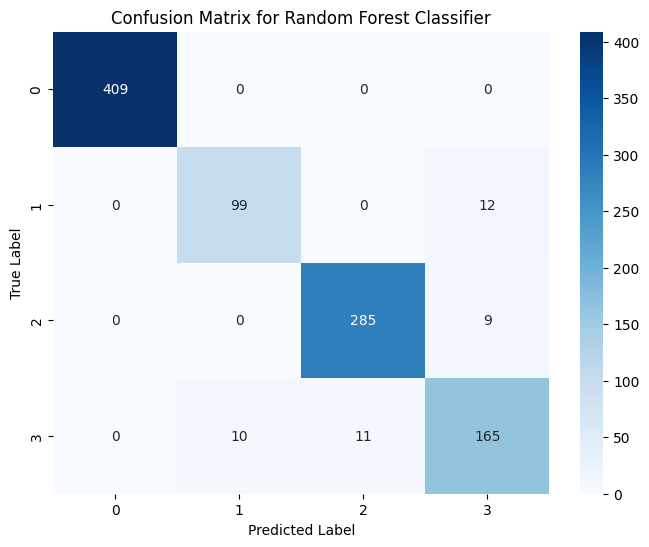

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


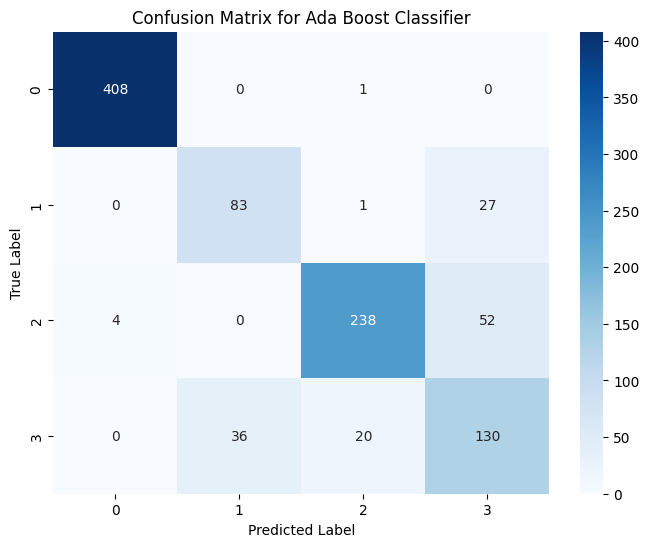

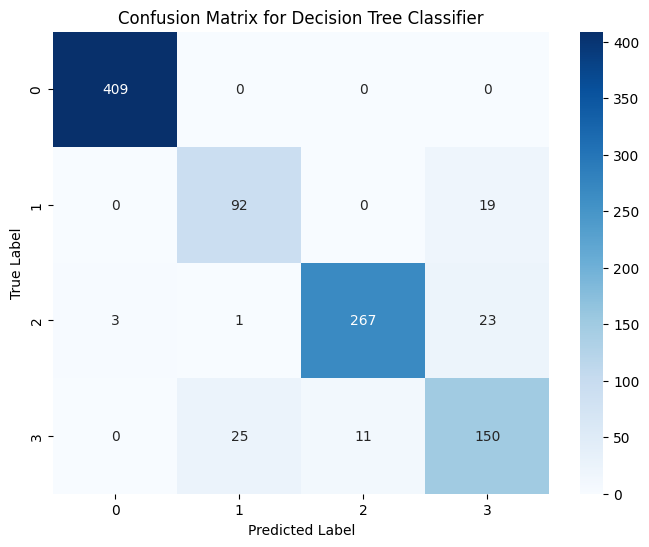

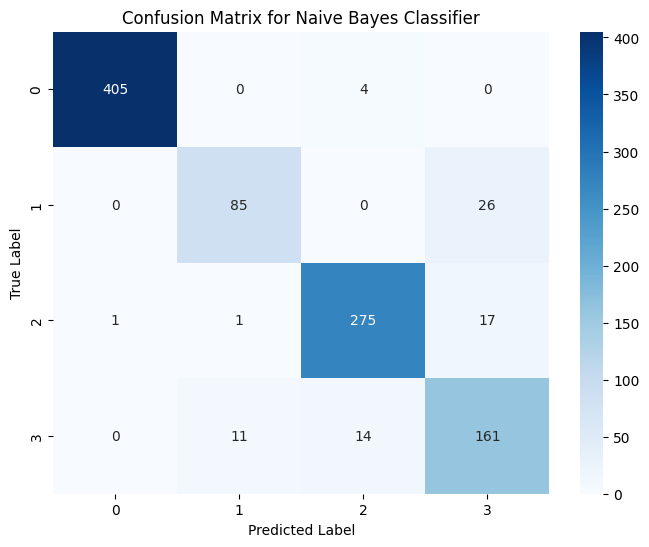

In [48]:
accuracy_results={}
for name,clf in classifier.items():
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy_results[name]=accuracy
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

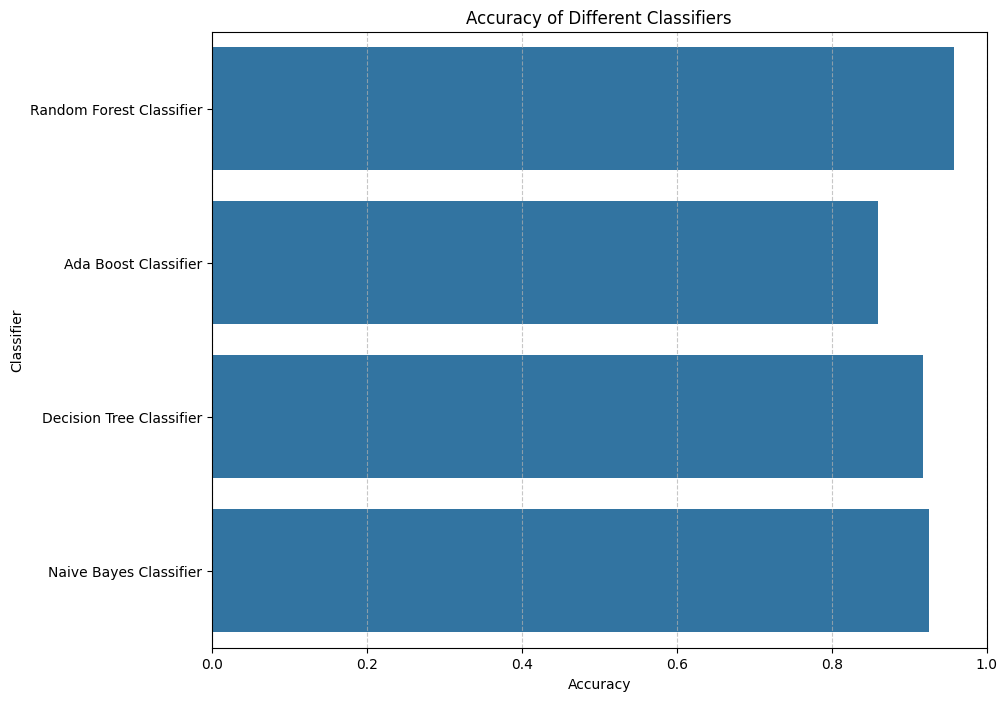

In [55]:
accuracy_df=pd.DataFrame(accuracy_results.items(),columns=["Classifier","Accuracy"])
plt.figure(figsize=(10, 8))
sns.barplot(x="Accuracy", y="Classifier", data=accuracy_df)
plt.title("Accuracy of Different Classifiers")
plt.xlabel("Accuracy")
plt.ylabel("Classifier")
plt.xlim(0, 1) 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()